# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, train_size=0.5)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

ModuleNotFoundError: No module named 'sklearn'

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,118,85,43,64,128,56,8,150,46,19,144,168,324,173,82,9,14,180,184
1,321,113,57,109,194,56,6,260,26,28,175,288,982,261,85,11,21,182,183
2,428,112,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
3,128,97,45,88,173,67,10,157,43,20,157,173,365,157,67,8,12,192,200
4,195,86,43,66,130,56,7,152,44,19,142,177,340,173,81,6,14,181,185
5,359,100,49,96,206,63,9,186,35,22,156,202,519,176,62,3,5,197,205
6,83,79,40,80,133,55,7,147,47,19,135,172,311,144,76,8,30,181,193
7,249,85,34,53,127,58,6,116,58,17,121,137,197,127,70,3,20,185,189
8,327,89,44,82,136,54,6,149,45,19,144,170,332,168,68,10,14,188,193
9,575,109,54,103,220,66,11,214,31,24,167,229,677,212,70,1,23,188,201


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.038251,94.052823,45.224044,82.841530,169.974499,61.646630,8.679417,170.306011,40.630237,20.693989,148.972678,190.051002,447.735883,176.338798,72.382514,6.495446,12.482696,188.952641,195.765027
std,239.846089,8.083220,6.231753,15.823457,33.940202,8.096075,4.542495,33.850320,7.834970,2.659712,14.675231,31.842753,180.918443,32.626033,7.332021,4.968741,8.925184,6.034083,7.314455
min,0.000000,76.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,220.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,418.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,180.000000,367.000000,175.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,630.000000,100.000000,51.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,218.000000,602.000000,199.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,116.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_train = normalizer.fit_transform(X_train)

X_test = normalizer.fit_transform(X_test)

X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.272968,-1.120974,-0.357214,-1.191820,-1.237847,-0.698089,-0.149706,-0.600424,0.685984,-0.637488,-0.339157,-0.693128,-0.684556,-0.102429,1.312906,0.504522,0.170158,-1.485032,-1.609929
1,-0.425820,2.346151,1.891393,1.654653,0.708523,-0.698089,-0.590394,2.652140,-1.869003,2.749423,1.775172,3.078827,2.955759,2.597264,1.722444,0.907405,0.955170,-1.153279,-1.746770
2,0.020706,2.222325,0.767089,1.338378,0.796994,-0.450830,0.511327,1.114565,-1.102507,1.244129,0.683905,1.035685,1.058148,0.296389,-0.734780,1.713172,1.067315,0.339609,0.853195
3,-1.231237,0.364937,-0.035985,0.326299,0.089223,0.661833,0.290983,-0.393442,0.302736,-0.261164,0.547497,-0.535963,-0.457727,-0.593282,-0.734780,0.303080,-0.054132,0.505485,0.579515
4,-0.951636,-0.997148,-0.357214,-1.065310,-1.178866,-0.698089,-0.370050,-0.541286,0.430485,-0.637488,-0.475566,-0.410232,-0.596037,-0.102429,1.176394,-0.099804,0.170158,-1.319155,-1.473089
5,-0.267241,0.736415,0.606475,0.832338,1.062408,0.167316,0.070639,0.464052,-0.719259,0.491482,0.479293,0.375592,0.394261,-0.010394,-1.417342,-0.704129,-0.839145,1.334867,1.263716
6,-1.419028,-1.863929,-0.839059,-0.179741,-1.090395,-0.821718,-0.370050,-0.689130,0.813733,-0.637488,-0.952995,-0.567396,-0.756477,-0.992100,0.493832,0.303080,1.964473,-1.319155,-0.378367
7,-0.726286,-1.120974,-1.802748,-1.887625,-1.267338,-0.450830,-0.590394,-1.605761,2.218975,-1.390135,-1.907853,-1.667550,-1.387170,-1.513632,-0.325243,-0.704129,0.843026,-0.655650,-0.925728
8,-0.400781,-0.625670,-0.196600,-0.053231,-1.001923,-0.945347,-0.590394,-0.629992,0.558234,-0.637488,-0.339157,-0.630262,-0.640296,-0.255820,-0.598268,0.705963,0.170158,-0.158021,-0.378367
9,0.634158,1.850848,1.409549,1.275123,1.475275,0.538204,0.511327,1.291977,-1.230256,1.244129,1.229539,1.224282,1.268379,1.094026,-0.325243,-1.107012,1.179460,-0.158021,0.716355


Делаем нормализацию данных.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot as skplt

reg=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500).fit(X_train, y_train)

y_pred=reg.predict(X_test)

print('f1 :', f1_score(y_test, y_pred, average='macro'))
print('accurace :', accuracy_score(y_test, y_pred))
print('accurace without normalize:',accuracy_score(y_test, y_pred, normalize=False))

f1 : 0.7937278253598788
accurace : 0.797979797979798
accurace without normalize: 237


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

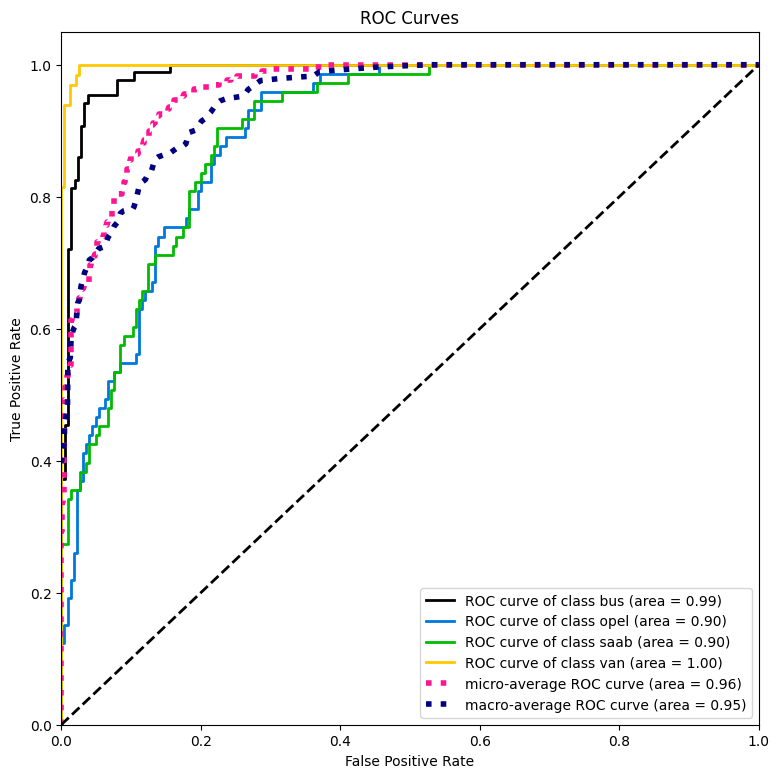

In [ ]:

prob = reg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob, figsize = [9,9])

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

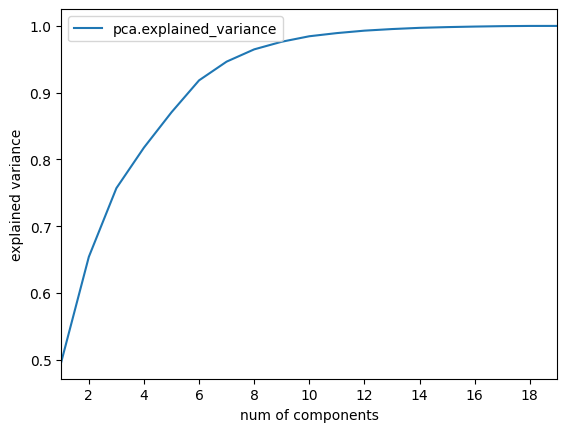

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sclr = StandardScaler()
pca = PCA()
pca = pca.fit(sclr.fit_transform(X_train,y_train))
pca_y = np.cumsum(pca.explained_variance_)
pca_y = pca_y / pca_y[len(pca_y)-1]
plt.plot(np.arange(1, pca.explained_variance_.shape[0] + 1), pca_y, label='pca.explained_variance')
plt.ylabel('explained variance')
plt.xlabel('num of components')
plt.xlim([1, pca.explained_variance_.shape[0]])
# plt.ylim([0, 10])
plt.legend()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# выбираем достаточно большое, но не слишком большое n 
num_comps = 10

pca = PCA(n_components=num_comps)




**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

f1 : 0.7053805899800945
accurace : 0.7171717171717171
accurace2: 213


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

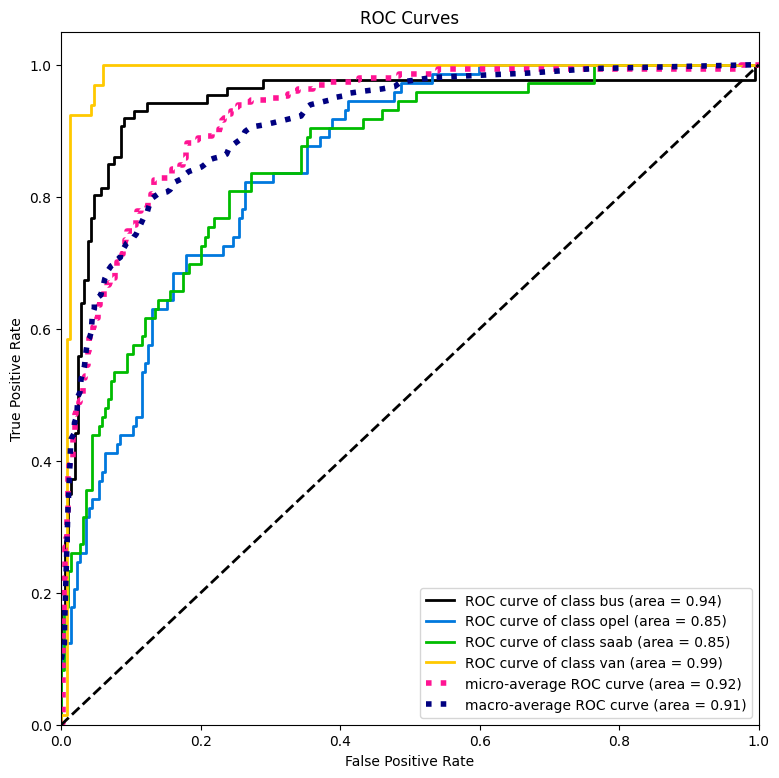

In [ ]:
logistic = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500) 

# pipe = Pipeline([('scaler', scaler), ('pca', pca), ('logistic', logistic)]).fit(X_train, y_train)
pipe = Pipeline([ ('pca', pca), ('logistic', logistic)]).fit(X_train, y_train)

predict = pipe.predict(X_test)  

print('f1 :', f1_score(y_test, predict, average='macro'))
print('accurace :', accuracy_score(y_test, predict))
print('accurace2:',accuracy_score(y_test, predict, normalize=False))                                                       


prob = pipe.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob, figsize=[9, 9])

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

(0.0, 30.0)

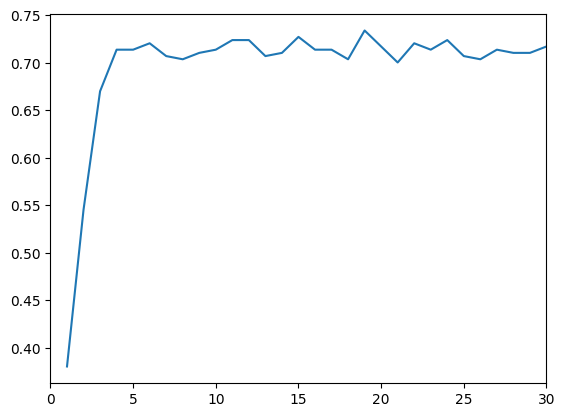

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

acc = np.zeros(100)

for i in range(1, 101):
    tree = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    acc[i - 1] = accuracy_score(y_test, tree_pred)

plt.plot(np.arange(1, 101, 1), acc)
plt.xlim([0,30])

Можно видеть, что при depth > 5 точность колеблется вблизи одного значения. Поэтому мы можем просто выбрать достаточно большое значение глубины.

f1 : 0.7125428184599096
accurace : 0.7239057239057239
accurace2: 215


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

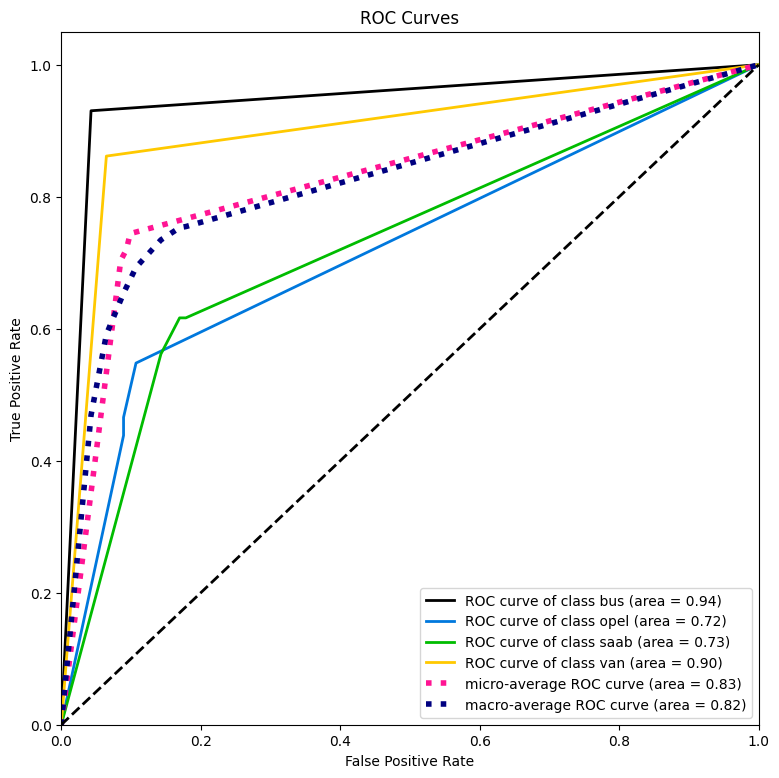

In [ ]:
max_depth = 15

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, y_train)

tree_pred = tree.predict(X_test)
print('f1 :', f1_score(y_test,tree_pred, average='macro'))
print('accurace :', accuracy_score(y_test, tree_pred))
print('accurace2:',accuracy_score(y_test, tree_pred, normalize=False))

prob = tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, prob, figsize=[9,9])

#как видим результаты стали хуже

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier 
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

x = np.arange(2, 100, 5)
f1 = np.zeros(len(x))
acc = np.zeros(len(x))
f1_train_bag = np.zeros(len(x))
acc_train_bag = np.zeros(len(x))

for i in range(len(x)): 
    Bag = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth=max_depth), n_estimators=x[i], random_state=0).fit(X_train, y_train) 

    acc[i] = accuracy_score(y_test, Bag.predict(X_test))
    f1[i] = f1_score(y_test, Bag.predict(X_test), average='macro')
    
    acc_train_bag[i] = accuracy_score(y_train, Bag.predict(X_train))
    f1_train_bag[i] = f1_score(y_train, Bag.predict(X_train), average='macro')


# prob = Bag.predict_proba(X_test)
# skplt.metrics.plot_roc(y_test, prob, figsize=[9, 9])

0.7351290684624018
0.7234833096407196


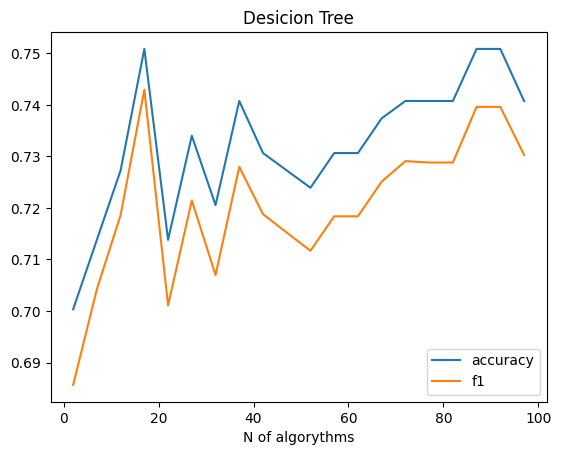

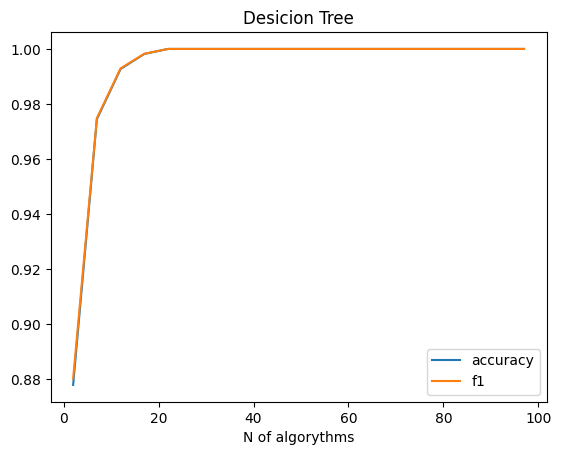

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

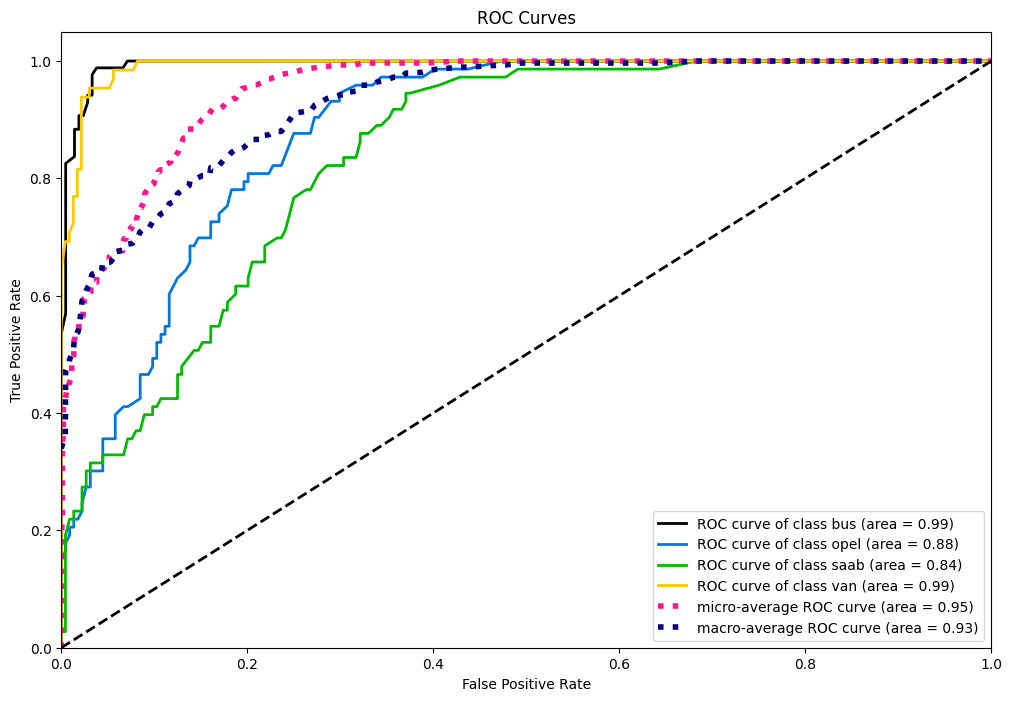

In [ ]:
print(np.mean(acc[2:]))
print(np.mean(f1[2:]))

plt.plot(x, acc, label = "accuracy")
plt.plot(x, f1, label = "f1")
plt.legend()
plt.title("Desicion Tree")
plt.xlabel("N of algorythms")
plt.show()

plt.plot(x, acc_train_bag, label = "accuracy")
plt.plot(x, f1_train_bag, label = "f1")
plt.legend()
plt.title("Desicion Tree")
plt.xlabel("N of algorythms")
plt.show()

probs= Bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

1) Оптимальное число алгоритмов - больше 20, и дальше особо разницы в выборе нет (происходит переобучение, что по факту плохо, но это не отражается на тестовой выборке). 
2) С учетом того факта, что выбор хорошего гиперпараметра был сделан на основе некоторой выборки (несколько раз запускался 2.5 и анализировался график с последующим выбором среднего значения), то в случае Бэггинга (т.е. по факту усреднения резльтатов обучения на разных выборках), в среднем, выбранный гиперпараметр также будет хорошим.

In [ ]:
# эта часть выполняется очень долго

from sklearn.linear_model import LogisticRegression

x = np.arange(2, 100, 5)
f1 = np.zeros(len(x))
acc = np.zeros(len(x))
f1_train = np.zeros(len(x))
acc_train = np.zeros(len(x))

logistic_params = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20, 50, 100]}
logistic = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, n_jobs=-1)
gs_logistic = GridSearchCV(logistic, logistic_params, n_jobs=-1)
gs_logistic.fit(X_train, y_train) 

best_c = gs_logistic.best_params_.get("C")

for i in range(len(x)): 
    # print(x[i], " num estimators") 
    bag = BaggingClassifier(estimator=LogisticRegression(C=best_c, multi_class='multinomial', solver='saga',tol=1e-3,max_iter=1000),max_samples = 0.2, n_estimators=x[i], random_state=0).fit(X_train, y_train) 

    acc[i] = bag.score(X_test, y_test)
    f1[i] = f1_score(y_test, bag.predict(X_test), average='macro')

    acc_train[i] = accuracy_score(y_train, Bag.predict(X_train))
    f1_train[i] = f1_score(y_train, Bag.predict(X_train), average='macro')

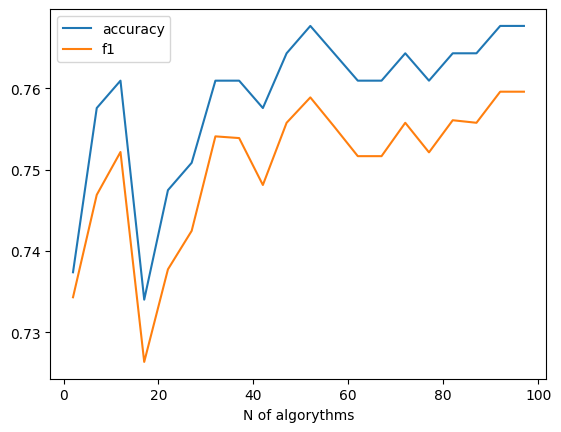

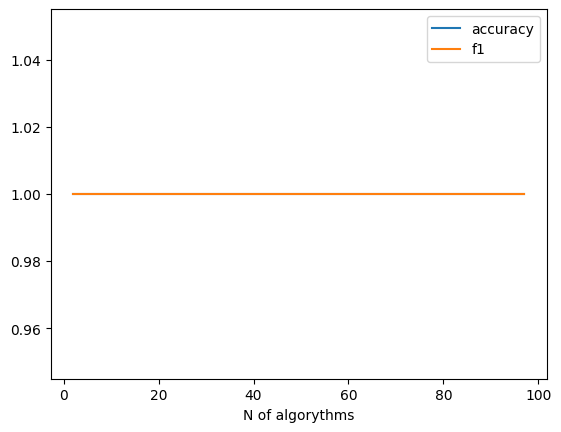

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

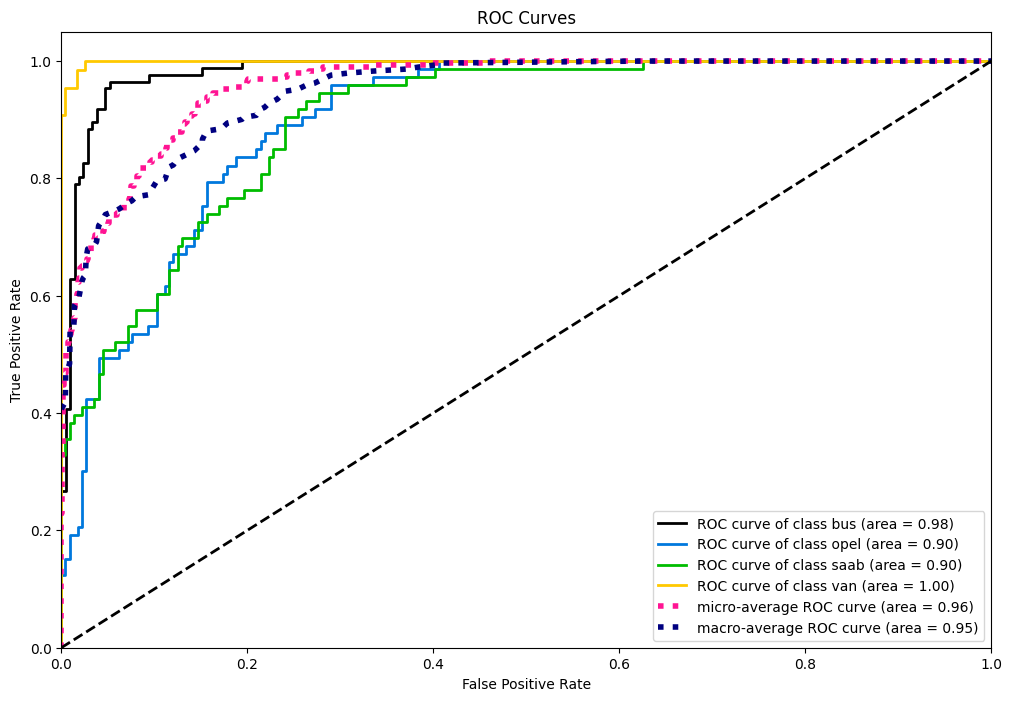

In [ ]:
plt.plot(x, acc, label = "accuracy")
plt.plot(x, f1, label = "f1")
plt.legend()
plt.xlabel("N of algorythms")
plt.show()

plt.plot(x, acc_train, label = "accuracy")
plt.plot(x, f1_train, label = "f1")
plt.legend()
plt.xlabel("N of algorythms")
plt.show()

probs= bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1_train = []
acc_train = []
f1_test = []
acc_test = []

massive = np.arange(1,40,1)

for n in (massive):
    # model_rf = Pipeline([('pca', PCA(n_components=num_comps)), ('fcl', RandomForestClassifier(n_estimators=n))]).fit(X_train, y_train)
    model_rf = RandomForestClassifier(n_estimators=n, n_jobs=-1).fit(X_train, y_train)
    
    f1_test.append(f1_score(y_test, model_rf.predict(X_test), average='macro'))
    f1_train.append(f1_score(y_train, model_rf.predict(X_train), average='macro'))
    
    acc_test.append(accuracy_score(y_test, model_rf.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model_rf.predict(X_train)))

0.7568825510001981
0.741220975241771
Accuracy worse
F1 worse


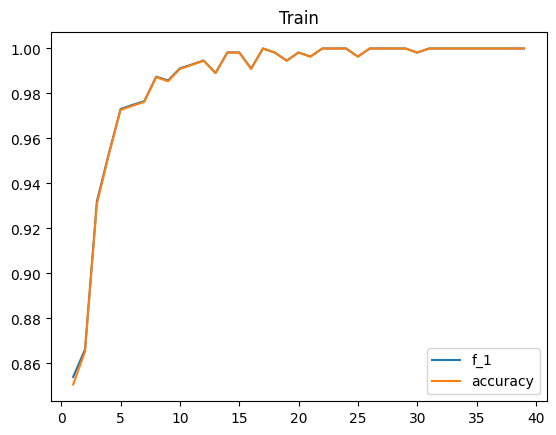

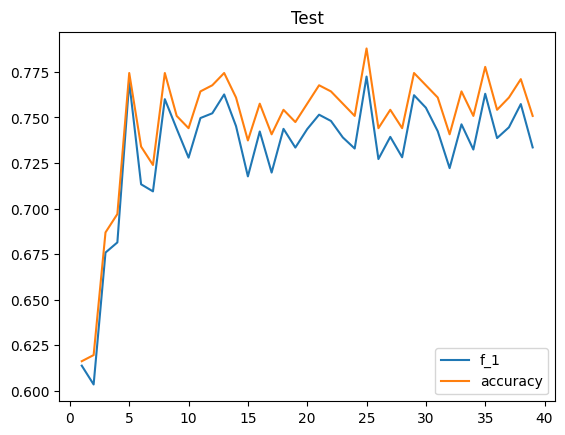

In [ ]:
print(np.mean(acc_test[5:]))
print(np.mean(f1_test[5:]))

if np.mean(acc_test[5:]) > np.mean(acc[2:]) :
    print("Accuracy better")
else:
    print("Accuracy worse")

if np.mean(f1_test[5:]) > np.mean(f1[2:]) :
    print("F1 better")
else:
    print("F1 worse")


plt.plot(massive,f1_train,label="f_1")
plt.plot(massive,acc_train,label="accuracy")
plt.legend()
plt.title("Train")
plt.show()

plt.plot(massive,f1_test,label="f_1")
plt.plot(massive,acc_test,label="accuracy")
plt.legend()
plt.title("Test")
plt.show()

Как видно по графикам, случайный лес ведет себя примерно также как и бэггинг на решающих деревьях (график для сравнения нижу)

In [ ]:
plt.plot(massive,f1_train, "r-", label="f_1 forest")
plt.plot(massive,acc_train, "b-", label="accuracy forest")

plt.plot(x, f1_train_bag, "r--", label = "f1 baggin")
plt.plot(x, acc_train_bag, "b--", label = "accuracy bagging")
plt.legend()
plt.title("Train")
plt.show()

plt.plot(massive,f1_train, "r-", label="f_1 forest")
plt.plot(massive,acc_train, "b-", label="accuracy forest")

plt.plot(x, f1_train_bag, "r--", label = "f1 baggin")
plt.plot(x, acc_train_bag, "b--", label = "accuracy bagging")
plt.legend()
plt.xlim(0,40)
plt.ylim(0.95,1)
plt.title("Train")
plt.show()

NameError: name 'plt' is not defined

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
import numpy as np

arr_pies_of_data = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

# print(arr_pies_of_test)

logistic_f1 = []
logistic_acc = []

for i in range(len(arr_pies_of_data)):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, train_size=(arr_pies_of_data[i]-0.1))
    # print(len(X_train),len(X_test),len(y_train),len(y_test))

    logistic = LogisticRegression(max_iter=1000, solver="saga",multi_class='multinomial',tol=1e-3)

    p_logistic = {'C': np.array([0.001,0.01,0.1,1,2,4,8,16,32,64,128])}

    gs_logistic = GridSearchCV(logistic,param_grid=p_logistic)
    gs_logistic.fit(X_train,y_train)
    # result.append(f1_score(gs_logistic, y_test, average='macro'))
    print(gs_logistic.best_params_, gs_logistic.best_score_)

    best_c = gs_logistic.best_params_.get("C")
    # print(best_cs)

    logistic = LogisticRegression(max_iter=1000, solver="saga",multi_class='multinomial',tol=1e-3, C=best_c).fit(X_train,y_train)

    logistic_f1.append(f1_score(y_test, logistic.predict(X_test), average='macro'))
    logistic_acc.append(accuracy_score(y_test, logistic.predict(X_test)))
 

{'C': 0.01} 0.511764705882353
{'C': 0.1} 0.6454545454545455
{'C': 0.01} 0.6637647058823529
{'C': 2.0} 0.6805531167690957
{'C': 0.01} 0.6997759103641457
{'C': 0.1} 0.6884876722966414
{'C': 0.1} 0.6908132744623272
{'C': 0.01} 0.6938235294117646
{'C': 1.0} 0.7030615755073959


In [ ]:
tree_f1 = []
tree_acc = []

for i in range(len(arr_pies_of_data)):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, train_size=(arr_pies_of_data[i]-0.1))
    # print(len(X_train),len(X_test),len(y_train),len(y_test))

    tree = DecisionTreeClassifier()

    p_tree = {'max_depth': np.array([1,2,4,8,16,32,64,128])}

    gs_tree = GridSearchCV(tree,param_grid=p_tree)
    gs_tree.fit(X_train,y_train)
    # result.append(f1_score(gs_logistic, y_test, average='macro'))
    print(gs_tree.best_params_, gs_tree.best_score_)

    best_max_depth = gs_tree.best_params_.get("max_depth")
    # print(best_cs)

    tree = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_train,y_train)

    tree_f1.append(f1_score(y_test, tree.predict(X_test), average='macro'))
    tree_acc.append(accuracy_score(y_test, tree.predict(X_test)))

{'max_depth': 128} 0.6654411764705882
{'max_depth': 32} 0.6147950089126559
{'max_depth': 4} 0.6168627450980392
{'max_depth': 4} 0.6598770851624233
{'max_depth': 64} 0.657170868347339
{'max_depth': 4} 0.6587070471753058
{'max_depth': 8} 0.7111095285571855
{'max_depth': 16} 0.7174291938997822
{'max_depth': 128} 0.7030271757825937


In [ ]:
forest_f1 = []
forest_acc = []

for i in range(len(arr_pies_of_data)):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, train_size=(arr_pies_of_data[i]-0.1))
    # print(len(X_train),len(X_test),len(y_train),len(y_test))

    forest = RandomForestClassifier()

    p_forest = {'n_estimators': np.arange(1,30,1)}

    gs_forest = GridSearchCV(forest,param_grid=p_forest)
    gs_forest.fit(X_train,y_train)
    # result.append(f1_score(gs_logistic, y_test, average='macro'))
    print(gs_forest.best_params_, gs_forest.best_score_)

    best_n_estimators = gs_forest.best_params_.get("n_estimators")
    # print(best_cs)

    forest = RandomForestClassifier(n_estimators=best_n_estimators).fit(X_train,y_train)

    forest_f1.append(f1_score(y_test, forest.predict(X_test), average='macro'))
    forest_acc.append(accuracy_score(y_test, forest.predict(X_test)))


{'n_estimators': 24} 0.7735294117647059
{'n_estimators': 18} 0.7342245989304813
{'n_estimators': 21} 0.7548235294117648
{'n_estimators': 26} 0.7719929762949956
{'n_estimators': 13} 0.7517647058823529
{'n_estimators': 25} 0.7594059405940593
{'n_estimators': 28} 0.7651616578834923
{'n_estimators': 26} 0.7411546840958605
{'n_estimators': 29} 0.7634846921224631


LR 0.7045751633986927 0.6790826015107652
Tree 0.681045751633987 0.6660430353892731
Forest 0.7019607843137254 0.6795672848713662


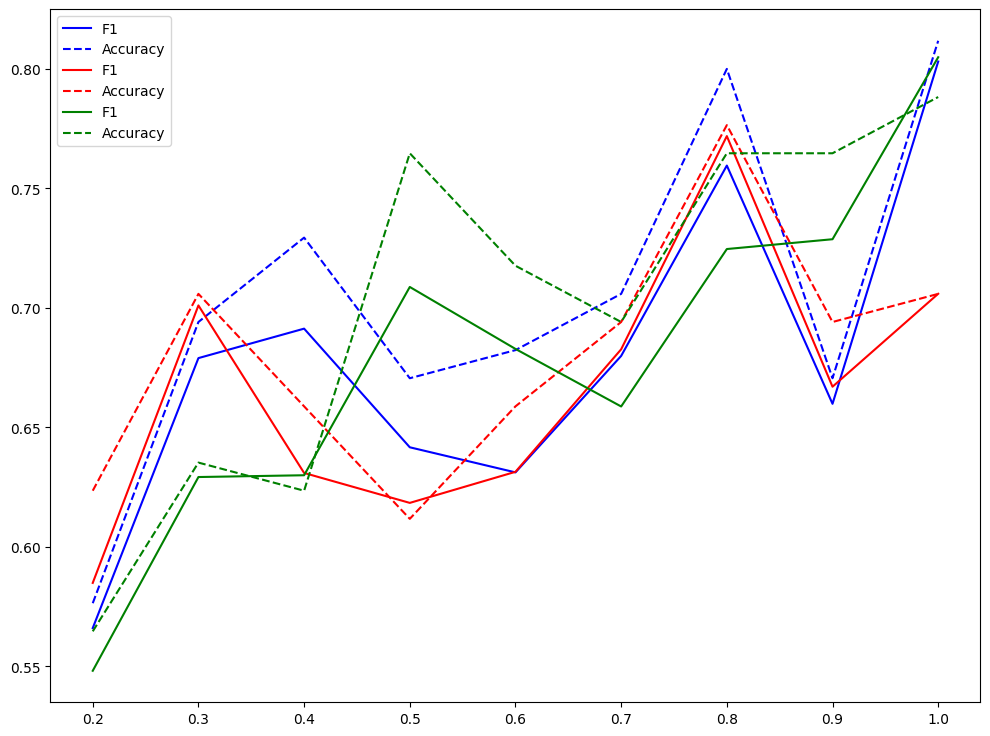

In [ ]:
print("LR", str(np.mean(logistic_acc)), str(np.mean(logistic_f1)))
print("Tree", str(np.mean(tree_acc)), str(np.mean(tree_f1)))
print("Forest", str(np.mean(forest_acc)), str(np.mean(forest_f1)))

plt.figure(figsize=(12,9))

plt.plot(arr_pies_of_data,logistic_f1,"b-",label="F1")
plt.plot(arr_pies_of_data,logistic_acc,"b--",label="Accuracy")

plt.plot(arr_pies_of_data,tree_f1,"r-",label="F1")
plt.plot(arr_pies_of_data,tree_acc,"r--",label="Accuracy")

plt.plot(arr_pies_of_data,forest_f1,"g-",label="F1")
plt.plot(arr_pies_of_data,forest_acc,"g--",label="Accuracy")

plt.legend()
plt.show() 

С увеличением размера тестовой выборки, также увеличиваются оценки f1 и accuracy

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
from sklearn.model_selection import GridSearchCV
# ! pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load data and split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

# Convert class names to integer labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define hyperparameters
params = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,220,240,260,280,300,350,400,450,500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Create XGBClassifier object
xgb = XGBClassifier()

# Use GridSearchCV to find optimal hyperparameters
gs_xgb= GridSearchCV(xgb, params, cv=5, n_jobs=-1)
gs_xgb.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters:", gs_xgb.best_params_)
print("Best score:", gs_xgb.best_score_)


best_n_estimators = gs_xgb.best_params_.get("n_estimators")
best_max_depth = gs_xgb.best_params_.get("max_depth")
best_learning_rate = gs_xgb.best_params_.get("learning_rate")


xgb = XGBClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,learning_rate=best_learning_rate).fit(X_train,y_train)

print(f1_score(y_test, xgb.predict(X_test), average='macro'))
print(accuracy_score(y_test, xgb.predict(X_test)))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 60}
Best score: 0.7959966638865722
0.7461487708323151
0.7407407407407407
